## Linear Regression

### Ordinary Least Squares

#### Introduction

The purpose of this notebook is to introduce the formulae relevant to linear regression, using least squares, and discuss its implementation in Python. Here we discuss Ordinary Least Squares (OLS) where we attempt to fit polynomials to data. We will introduce the design matrix and show how it can be populated by a data file containg CVS separated data points. We will fit different polynomials to the data using OLS.

#### The Design Matrix

Assume we want to fit a polynomial to a data set. We will consider one dimensional measurement values first. A data set then consists of a set of pairs of numbers: $ \cup^N_{i=1} \left\{ (x_i, y_i) \right\}$.

A third degree polynomial for example has the general
form:
$$
f(x) = a + bx + cx^2 + dx^3
$$
The objective of linear regression is to fit a polynomial of a given degree to a data set. This means that we want to find numbers $a, b, c, d$ such that in some sense when we apply $f(x)$ to data point $x_i$, the value will
be 'as close as possible' to the actual measured value $y_i$. Clearly the higher degree of the polynomial, the
more flexible our fit can be. This has to be balanced against the possibility of *overfitting*.

Ordinary Least Squares aims to minimise the sum of the squared residuals where the residual for data point $i$, $(x_i, y_i)$, is defined as:
$$
  r_i = y_i - f(x_i)
$$
Clearly the residu is dependent on the choice we've made for $a, b, c$ and $d$ and we want to find values such
that
$$
\sum_i r^2_i
$$
is minimal. The solution to this is well known and can be formulated in terms of the *design matrix*.

We rewrite our polynomial in a more general notation:
$$
f(x) = {\bf w}^T{\bf \phi}(x)
$$

This notation is shorthand for:
$$
f(x) = \sum^M_{i=1} w_i \phi^i(x)
$$
Here ${\bf \phi}$ is the vector:
$$
{\bf \phi}(x) = \left( \begin{array}{l} 1 \\ x \\ x^2 \\ x^3 \end{array} \right)
$$
whilst
$$
{\bf w} = \left( \begin{array}{l} a \\ b \\ c\\ d\end{array} \right)
$$
so that the matrix product ${\bf w}^T {\bf \phi}(x)$ works out as:
$$
{\bf w}^T{\bf \phi}(x) = \left( \begin{array}{llll} a & b & c & d \end{array} \right) \left( \begin{array}{l} 1 \\ x \\ x^2 \\ x^3 \end{array} \right) = a + bx + cx^2 + d x^3
$$
In this notebook we main the convention that $\phi^i$ is the $i$-th component of $N \times 1$ matrix  ${\bf \phi}$, whereas
$w_j$ is the $j$-th component of the $1 \times N$ matrix ${\bf w}^T$.

This notation has the advantage that it generalises to polynomials of any dimension. The degree of the polynomial that we regress to is $M$, in the example thus far $M=4$, but the notation extends trivially to any dimension.

For each data point we have a column vector ${\bf \phi}(x_n)$. The *desigin matrix* is an $N \times M$ matrix whose
elements are given by $\Phi_{nj} = \phi_j(x_n)$ so that:
\begin{equation}
\Phi = \left( \begin{array}{cccc} \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1) \\
                                  \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2) \\
                                  \vdots      & \vdots      &        & \vdots          \\
                                  \phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{M-1}(x_N) \end{array}\right)
\end{equation}

As an example, we will read in a dataset that we want to fit by a linear function ($M=2$).


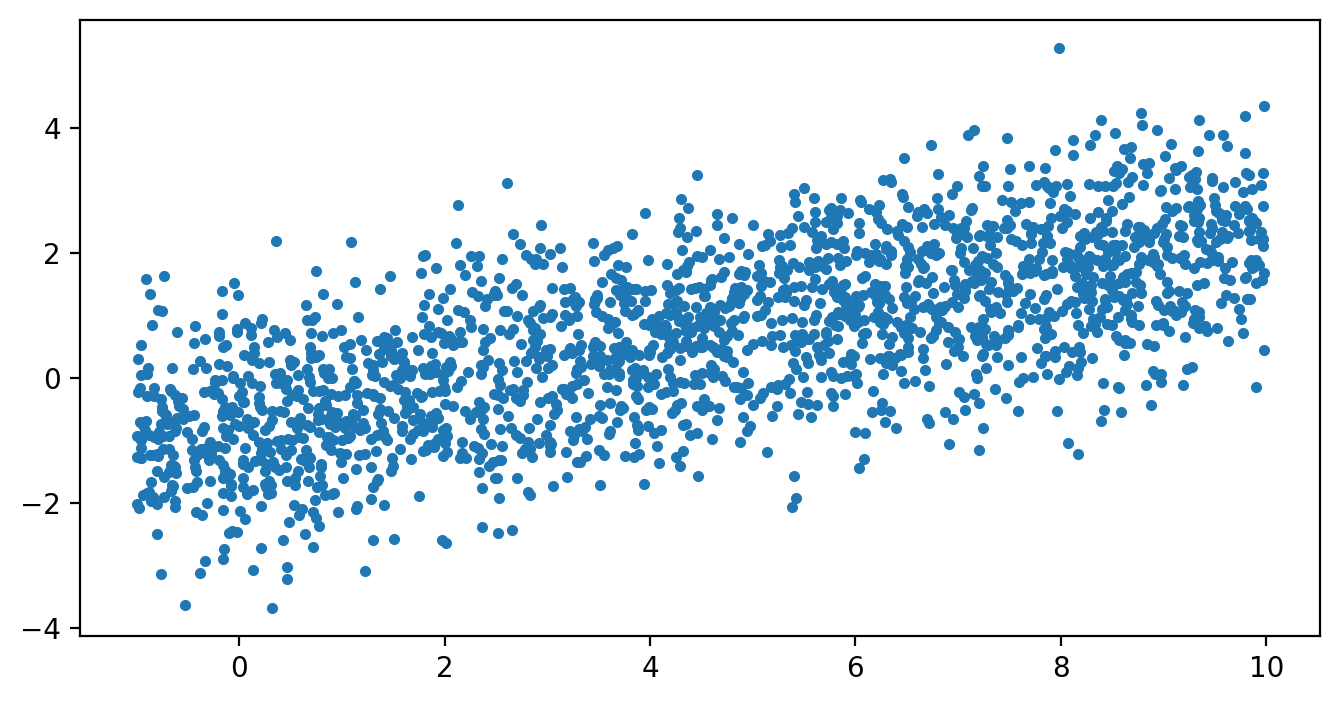

In [ ]:
 # Generate a sample of points first
size= 2000 # number of data points

a = 0.3 # gradient
b = -0.7 # intercept

sigma = 1.0 # noise level

from numpy.random import default_rng
rng = default_rng()
x = rng.uniform(-1,10,size)
epsilon = rng.normal(0.,sigma,size)
y = a*x + b + epsilon

plt.plot(x,y,'.')

def outfile(filename,x,y):
    with open(filename,'w') as f:
        for pair in zip(x,y):
            f.write(str(pair[0]) + ',' + str(pair[1])  + '\n')

outfile('linnoise.dat',x,y)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

import numpy as  np

with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]


Phi = np.array([np.power(xs,0),np.power(xs,1)]).T # for every degree of the polynomial we add a column to the design matrix

The OLS solution is formally given by:
$$
{\bf w}_{ML} = ({\bf \Phi}^T{\bf \Phi})^{-1} {\bf \Phi}^T {\bf t}
$$

$t$ is the vector of values $y_i$, so an $N \times 1$ matrix:
$$
{\bf t} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N \end{array} \right)
$$
The quantity ${\bf \Phi}^{\dagger} \equiv ({\bf \Phi}^T{\bf \Phi})^{-1}{\bf \Phi}^T$ is known as the *Moore-Penrose pseudo-inverse*.
It is the product  of an $M \times N$ and a $N  \times M$ matrix, so an $M \times M$ matrix, which
is inverted, and thereby remains an $M \times  M$ matrix, which is right multiplied by an $M \times N$ matrix,
so an $M \times N$ matrix. When this is applied to $N \times 1$ matrix (vector) ${\bf t}$, an $M \times 1$
matrix results, which contains the coefficients of the OLS polynomial.

This is *not* the recommend numerical solution which uses SVD decomposition to avoid numerical instabilities, but it often works.

In [ ]:
Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)
print(w)

[-0.72700129  0.30541892]


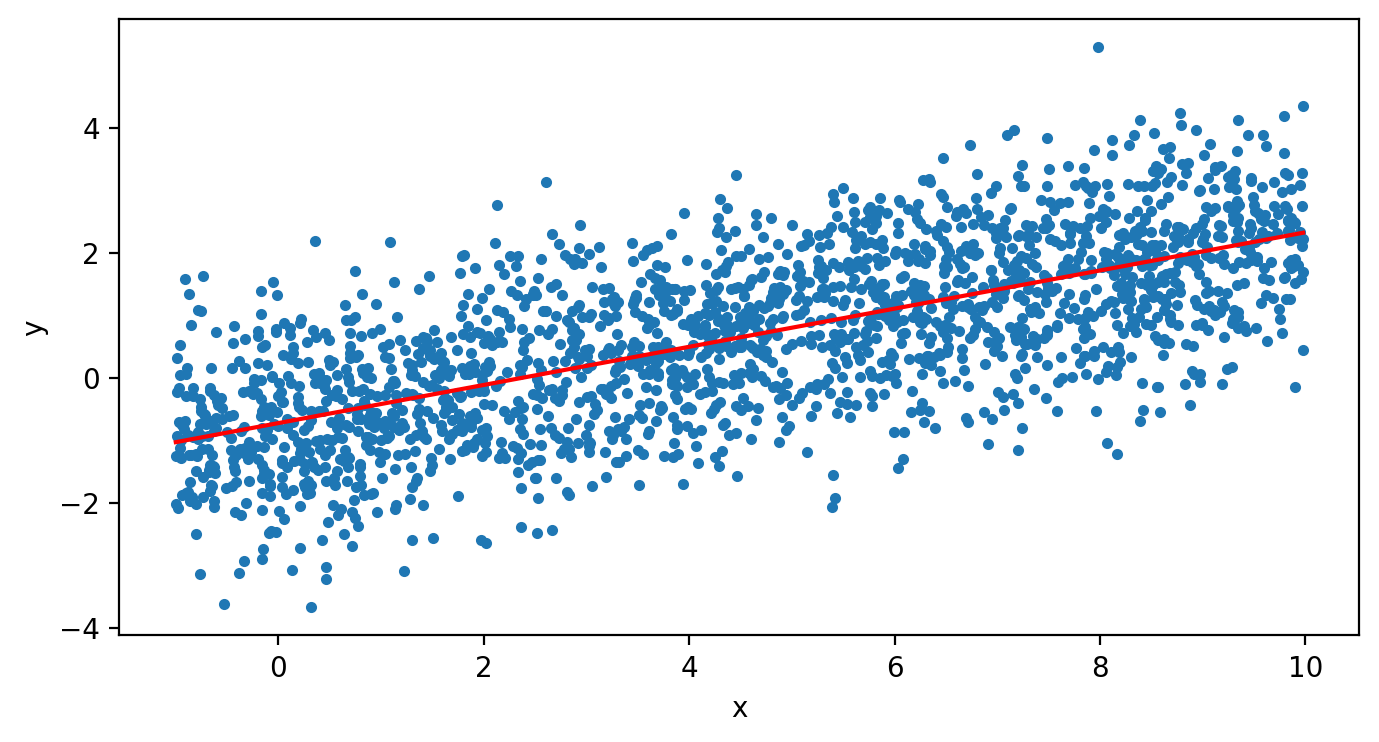

In [ ]:
import matplotlib.pyplot as plt

x_min = np.min(xs)
x_max = np.max(xs)

x_fit = np.linspace(x_min,x_max,100)
y_fit = w[1]*x_fit + w[0]
plt.plot(xs,t,'.')
plt.plot(x_fit,y_fit,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('linres.pdf')

Fitting a third order polynomial is a straightforward extension.

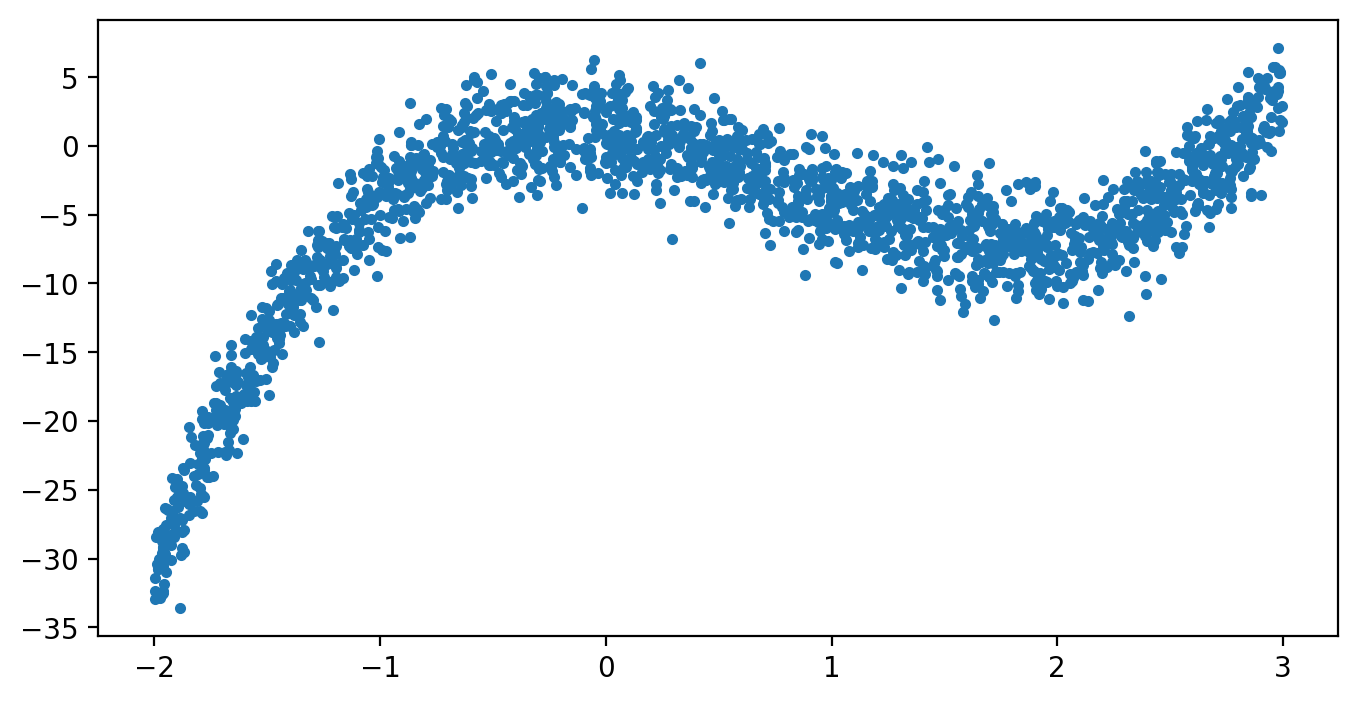

In [ ]:
# Generate a sample of points first

a = 2
b = -5
c = -2
d = 1
sigma= 2.0
epsilon = rng.normal(0.,sigma,size)
x = rng.uniform(-2,3,size)
y = a*x*x*x + b*x*x + c*x + d + epsilon

plt.plot(x,y,'.')
outfile('cubnoise.dat',x,y)



with open('cubnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

n_degree = 4 # a cubic polynomial has four coefficients
Phi = np.array([np.power(xs,i) for i in range(n_degree)]).T


In [ ]:
Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)
print(w)

[ 1.05996281 -2.12832214 -5.02475138  2.03302754]


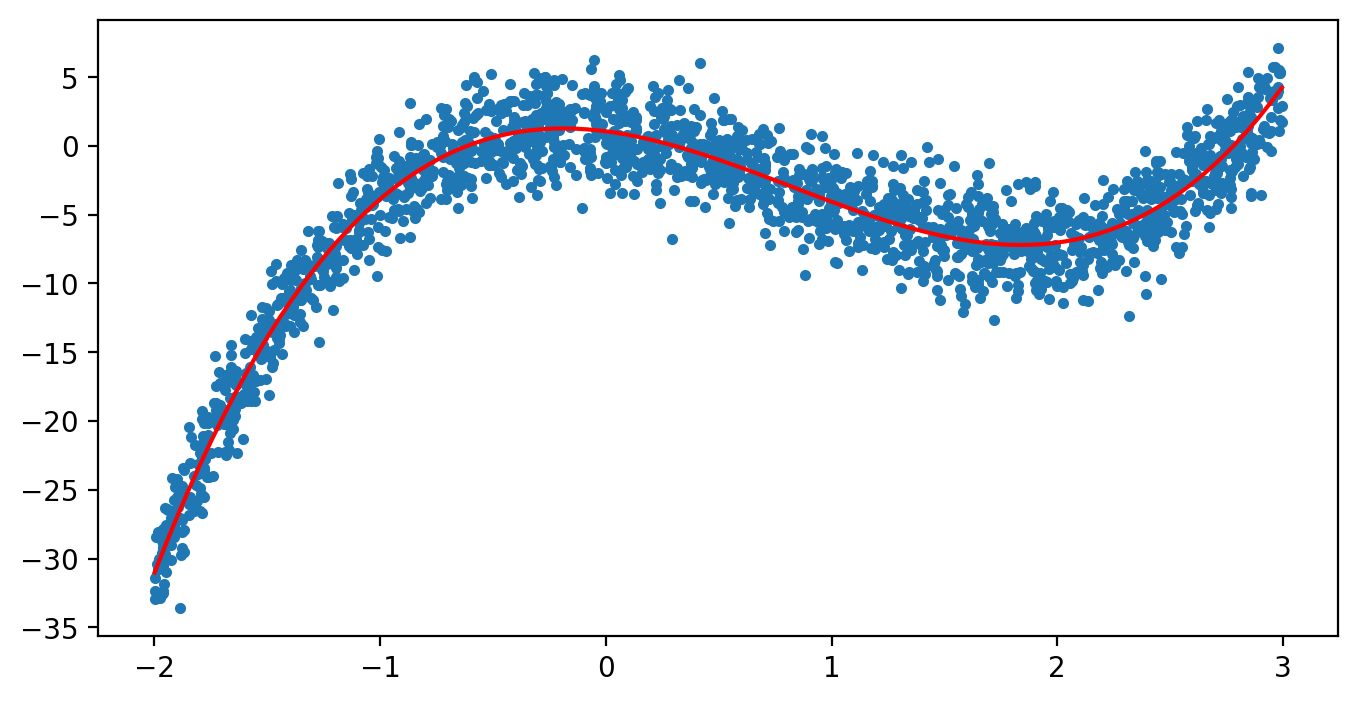

In [ ]:
x_min = np.min(xs)
x_max = np.max(xs)

x_fit = np.linspace(x_min,x_max,100)

# this is what we want to do, but it is cluncky, you can uncomment to see it works, but it's better to use polyval
#y_fit = w[3]*x_fit*x_fit*x_fit + w[2]*x_fit*x_fit + w[1]*x_fit + w[0]
y_fit = np.polyval(np.flip(w),x_fit) # polyval applies w[0] to x**3, so w needs to be reversed

plt.plot(xs,t,'.')
plt.plot(x_fit,y_fit,'r-')
plt.savefig('cubic.pdf')

The results, by visual inspection, appear quite reasonable and the coefficents (weights) are neither small nor large.

### Linear Regression on Other Basis Functions

We can create a number of Gaussian functions:
$\mu = 0, 1, \cdots, 10$ and use them as basis functions instead of polynomials.

The basis vectors $\phi$, then become:
$$
\boldsymbol{\phi}(x_i) = \left( \begin{array}{c} \mathcal{N}(x_i - 0, 1) \\ \mathcal{N}(x_i - 1,1) \\ \vdots \\ \mathcal{N}(x_i - 10,1) \end{array} \right)
$$


[ 0.05750866  0.03752982  0.8790157   0.26092926 -0.36991762  0.33586152
  2.8958618  -0.01509757 -0.00845412 -0.01580956]


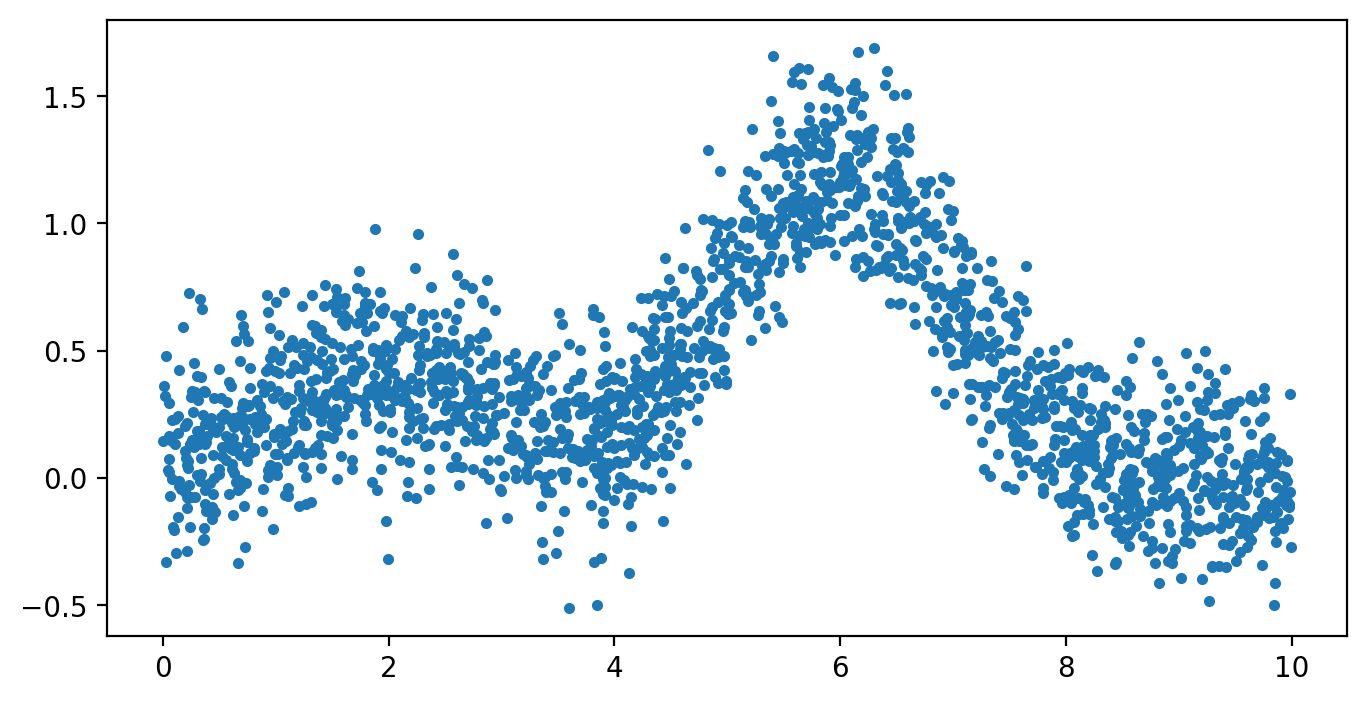

In [ ]:
from scipy.stats import norm

# Generate a sample of points first
sigma=0.2
epsilon = rng.normal(0.,sigma,size)

x = rng.uniform(0,10,size)
y = norm.pdf(x,2.0,1.0) + 3*norm.pdf(x,6.0,1.0) + epsilon

plt.plot(x,y,'.')
outfile('gaussnoise.dat',x,y)


with open('gaussnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

Phi = np.array([norm.pdf(xs,i,1.0) for i in range(10)]).T

Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)

print(w)

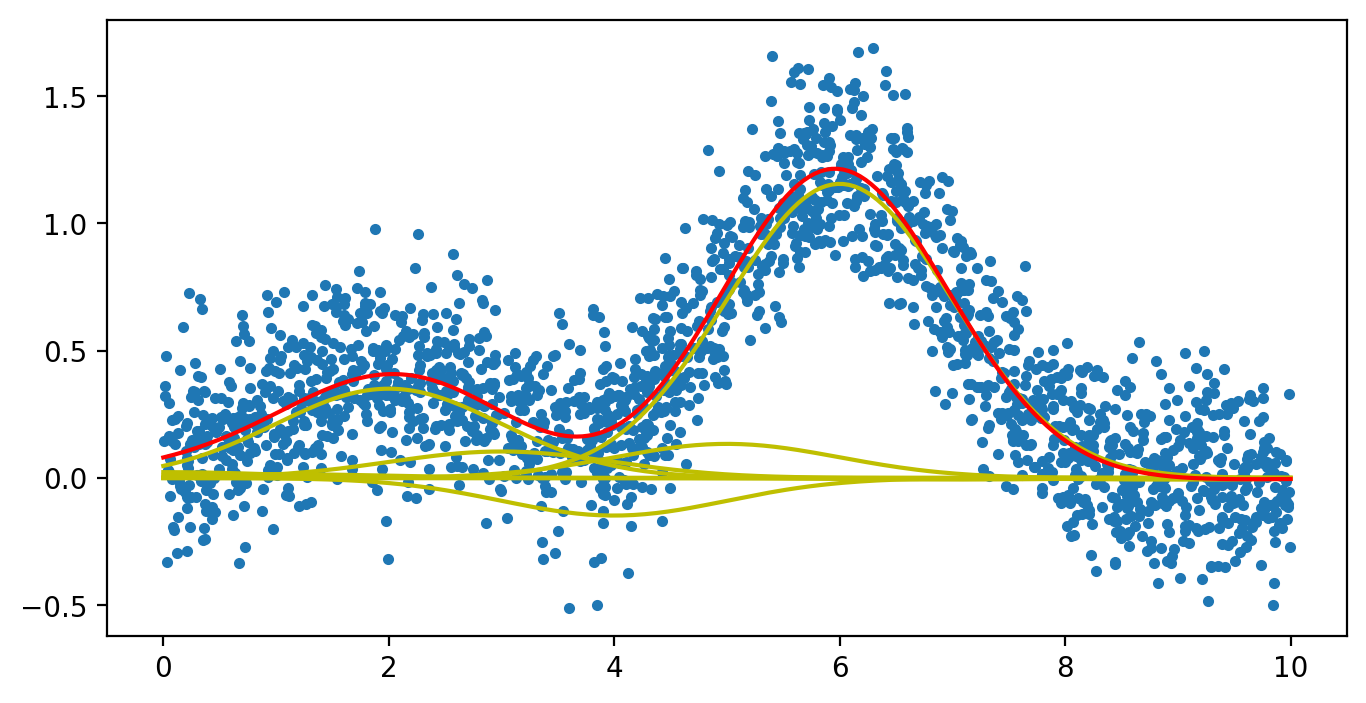

In [ ]:
plt.plot(xs,t,'.')
x = np.linspace(0,10,200)
l=[w[i]*norm.pdf(x,i,1.0) for i in range(len(w))]
for g in l:
    plt.plot(x,g,'y-')
tot=sum(l)
plt.plot(x,tot,'r-')

The plot above shows all basis functions multiplied by their regression coefficient (yellow) and their sum (red). In this particular case, Gaussian functions provide an adequate set of basis functions.

## Legendre polynomial fitting


Legendre polynomials are orthogonal polynomials. In conventional polynomials, the basis functions are not orthogonal. As we increase the order, the set of functions will have redundancy, which will eventually result in the matrix $X$ being noninvertible.



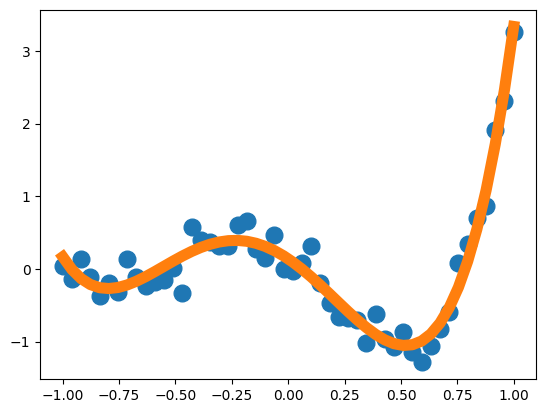

In [2]:
# Example of Legendre polynomial fitting

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre
N = 50
x = np.linspace(-1,1,N)
a = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])
y = a[0]*eval_legendre(0,x) + a[1]*eval_legendre(1,x) + \
a[2]*eval_legendre(2,x) + a[3]*eval_legendre(3,x) + \
a[4]*eval_legendre(4,x) + 0.2*np.random.randn(N)
X = np.column_stack((eval_legendre(0,x), eval_legendre(1,x), \
eval_legendre(2,x), eval_legendre(3,x), \
eval_legendre(4,x)))
theta = np.linalg.lstsq(X, y, rcond=None)[0]
t = np.linspace(-1, 1, 50);
yhat = theta[0]*eval_legendre(0,t) + theta[1]*eval_legendre(1,t) + \
theta[2]*eval_legendre(2,t) + theta[3]*eval_legendre(3,t) + \
theta[4]*eval_legendre(4,t)
plt.plot(x,y,'o',markersize=12)
plt.plot(t,yhat, linewidth=8)
plt.show()


The above figure demonstrates a fitting problem using the Legendre polynomials. You can see that the fitting is just as good as that of the ordinary polynomials (which should be the case). However, if we compare the coefficients, we observe that the magnitude of the Legendre coefficients is smaller (try it).

In general, as the order of polynomials increases and the noise grows, the ordinary polynomials will become increasingly difficult to fit the data.